
<a id='chap-tpsvmlineaires'></a>

# Travaux pratiques : 
# Partie 1 : cas de données spéparables (SVM linéaires)

---



L’objectif de cette séance de travaux pratiques est d’illustrer l’utilisation des machines à vecteurs de support  (*Support Vector Machines*, SVM) pour les problèmes de classification linéaires en python avec Scikit-learn.


## Machines à vecteurs de support linéaires

Les machines à vecteurs de support (SVM : *Support Vector Machines*) sont une classe de méthodes d’apprentissage statistique basées sur le principe de la maximisation de la marge (séparation des classes). Il existe plusieurs formulations (linéaires, versions à noyaux) qui peuvent s’appliquer sur des données séparables (linéairement) mais aussi sur des données non séparables.

Les avantages des SVM :
- Elle tend à maximiser une marge,       
capable de traiter des problèmes de grandes dimensions.               
- La formulation théorique de ce type d'algorithme (borne de l'erreur de généralisation) est :       
    - fonction du nombre d'exemples et est indépendante de la dimension des donnée.               
    - L’astuce du noyau permet de traiter des problèmes de classification  non linéaire.


Désavantages :

- Si le nombre d’attributs est beaucoup plus grand que le nombre d’échantillons, les performances sont moins bonnes.  
- Comme il s’agit de méthodes de discrimination entre les classes, elles ne fournissent pas d’estimations de probabilités d'une façon directe, néanmoins il existe des solutions pour l'estimation de la probabilité d'appartenance d'un élément à une classe.

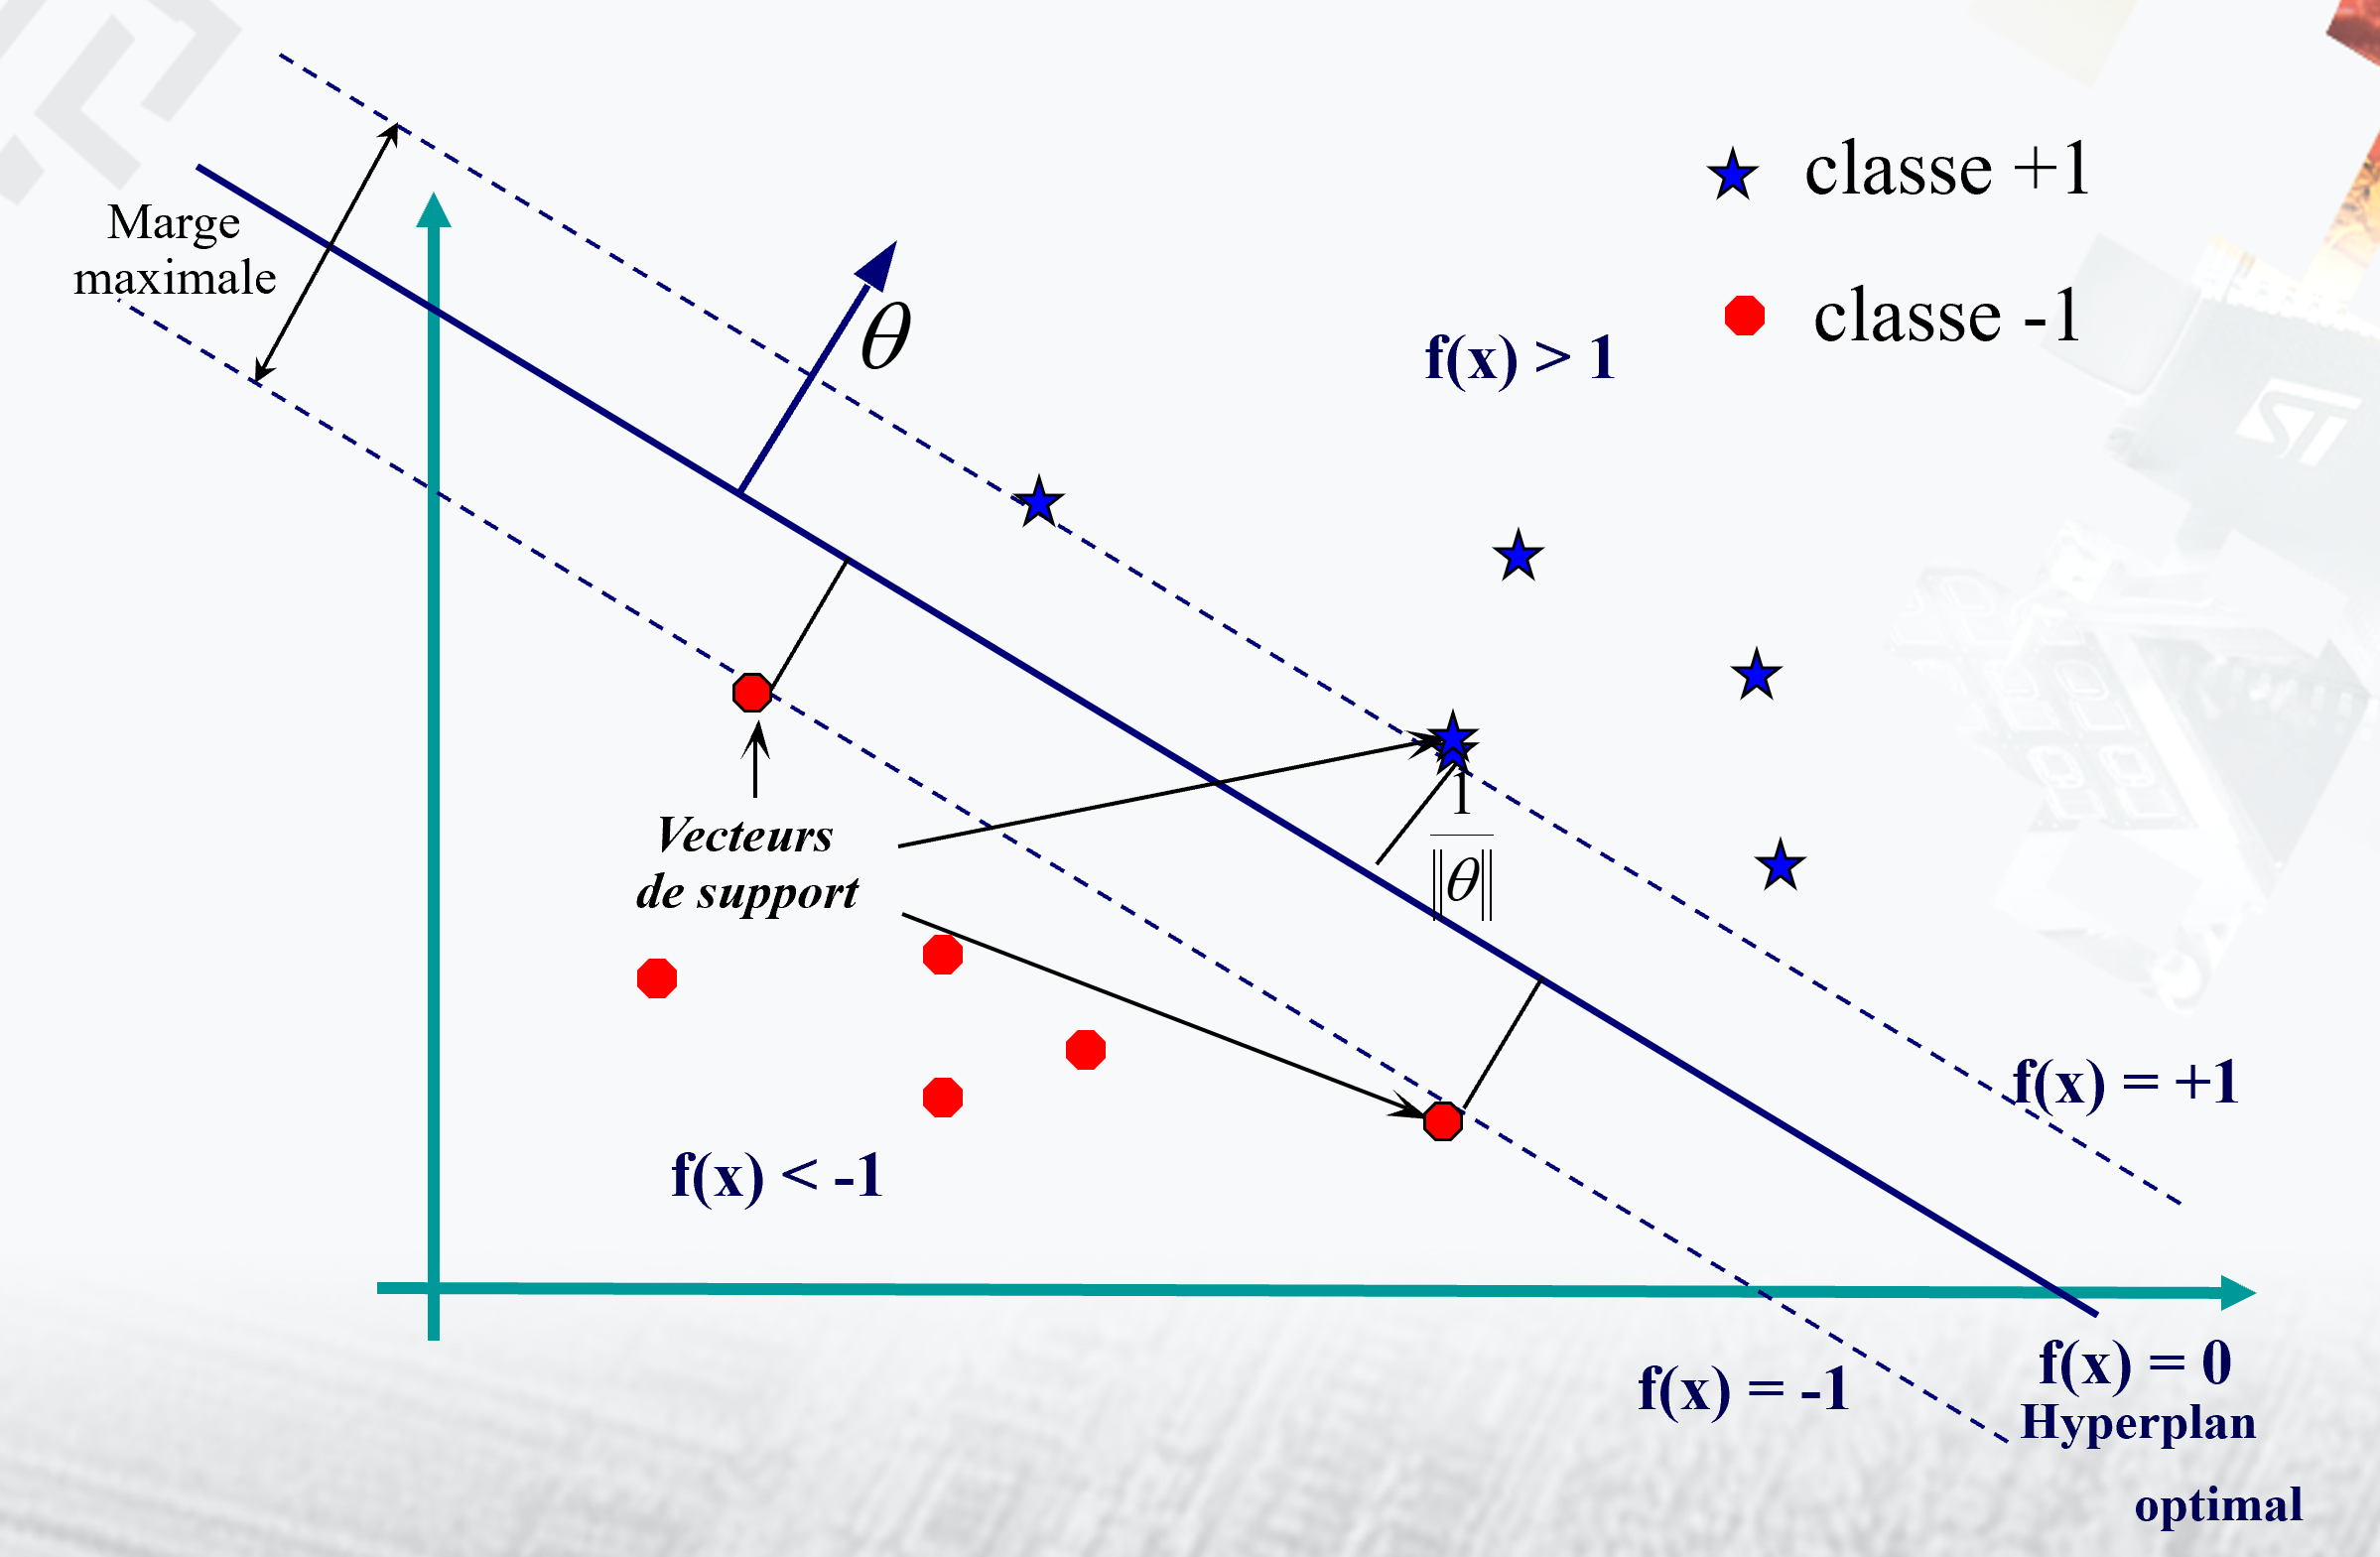

## Jeu de données Iris

Dans Scikit-learn, les SVM sont implémentées dans le module `sklearn.svm`. Dans cette partie nous allons nous intéresser à la version linéaire. Dans ce TP nous allons utiliser le jeu de données Iris. Pour pouvoir afficher les résultats, on va utiliser seulement les premiers deux attributs (longueur et largeur des sépales).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn.metrics import f1_score

# Chargement des données
iris = datasets.load_iris()
data = sns.load_dataset("iris")

# Pré-analyse des données (EDA) :
Questions : 


- data.head()
- data.columns.array
- data.dtypes
- data.isna().sum()
- data.info()
- data.describe()
- seaborn.pairplot : sns.pairplot(data=data, hue='Outcome')








In [3]:
#Affiche les 5 premières lignes du dataframe
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.columns.array #5 colonnes

<PandasArray>
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
Length: 5, dtype: object

In [5]:
data.dtypes #Affiche le type de donnée de chaque colonne

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [6]:
data.isna().sum() #Il n'y a pas de valeur null

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
data.info() #Permet d'afficher le nombre d'élément null et le type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
data.describe() #Plusieurs calculs fait sur le dataFrame (comptage, moyenne, écart-type etc...)

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


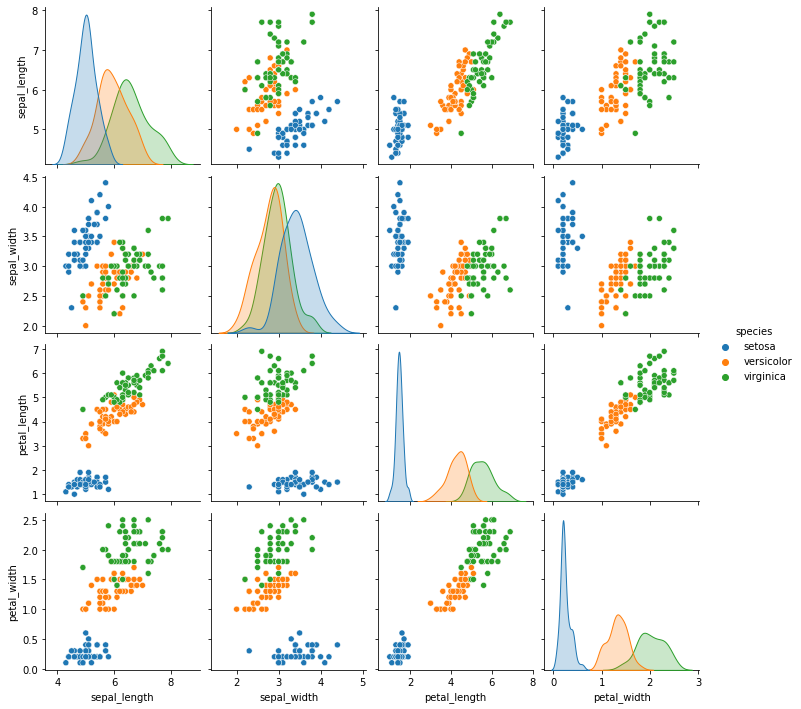

In [9]:
sns.pairplot(data=data, hue='species') #Visualisation des données de data dans un pairplot entre 4 colonnes. Le type de species est différencié par sa couleur

Pour commencer, nous ne conservons que les deux premiers attributs du jeu de données :

In [10]:
X, y = iris.data[:, :2], iris.target
# On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

Nous pouvons maintenant entraîner une machine à vecteur de support linéaire :

In [11]:
C = 1.0 # paramètre de régularisation
lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC()

## Question

Calculez le score d’échantillons bien classifiés sur le jeu de données de test.

In [12]:
pred = lin_svc.predict(X_test)
f1_score(pred, y_test, average="micro")

0.8000000000000002

Visualisons maintenant la surface de décision apprise par notre modèle :

Text(0.5, 1.0, 'LinearSVC')

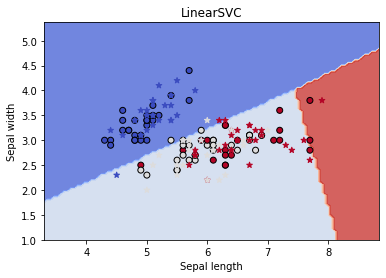

In [13]:
C = 0.1 # paramètre de régularisation
lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(X_train, y_train)
# Créer la surface de décision discretisée
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# Pour afficher la surface de décision on va discrétiser l'espace avec un pas h
h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Surface de décision
Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Afficher aussi les points d'apprentissage
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("LinearSVC")

## Question :

Testez differentes valeurs pour le paramètre C. Comment la frontière de décision évolue en fonction de C ?

In [ ]:
#La frontière bleue ne change pas ou très peu. Plus la valeur est faible, plus le rouge s'étend sur le blanc et inversement lorsque C devient grand

## Question

D’après la visualisation ci-dessus, ce modèle vous paraît-il adapté au problème ? Si non, que peut-on faire pour l’améliorer ?

Nous verrons dans le prochain TP que scikit-learn permet de manipuler des machines à vecteurs de support avec des noyaux non-linéaires dans la classe `SVC`.

Les modèles linéaires `LinearSVC()` et `SVC(kernel='linear')`, comme nous l’avons déjà dit, produisent des résultats légèrement différents à cause du fait qu’ils optimisent des fonctions de coût différentes mais aussi à cause du fait qu’ils gèrent les problèmes multi-classe de manière différente (linearSVC utilise *One-vs-All* et SVC utilise *One-vs-One*).

In [ ]:
#Non il ne parait pas adapté, il faut modifier les hyperparamètres.

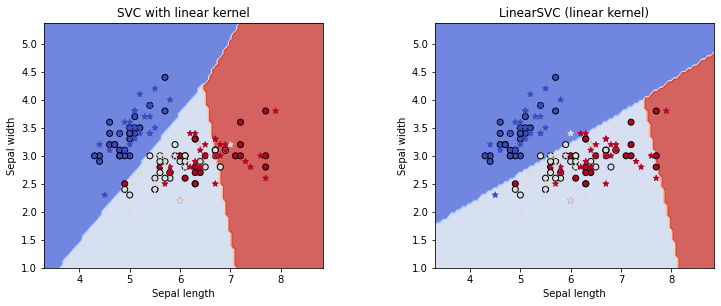

In [14]:
lin_svc = svm.LinearSVC(C=C).fit(X_train, y_train)
svc = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)

titles = ['SVC with linear kernel', 'LinearSVC (linear kernel)']

fig = plt.figure(figsize=(12, 4.5))

for i, clf in enumerate((svc, lin_svc)):
    plt.subplot(1, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Utiliser une palette de couleurs
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    # Afficher aussi les points d'apprentissage
    plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
    plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title(titles[i])
plt.show()

Pour l’instant, nous n’avons exploité que deux variables explicatives. Néanmoins, l’intérêt des machines à vecteur de support linéaires est qu’il est souvent plus facile de trouver des hyperplans séparateurs dans des espaces de grande dimension.

## Question

Réalisez l’optimisation d’une nouvelle machine à vecteur de support linéaire mais en utilisant les quatre attributs du jeu de données Iris. Le score de classification en test a-t-il augmenté ? Pourquoi ?

In [15]:
X, y = iris.data[:, :4], iris.target
# On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
C = 1.0 # paramètre de régularisation
lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(X_train, y_train)
pred = lin_svc.predict(X_test)
f1_score(pred, y_test, average='micro')
#Le score a augmenté car avec plus de données, il s'entraine plus et donc aura moins d'erreur à la fin.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.9733333333333334

# Partie 2 : SVM Non linéaires

---



L’objectif de cette partie est d’illustrer l’utilisation des machines à vecteurs de support  (*Support Vector Machines*, SVM) pour les problèmes de classification non linéaires en python avec Scikit-learn.


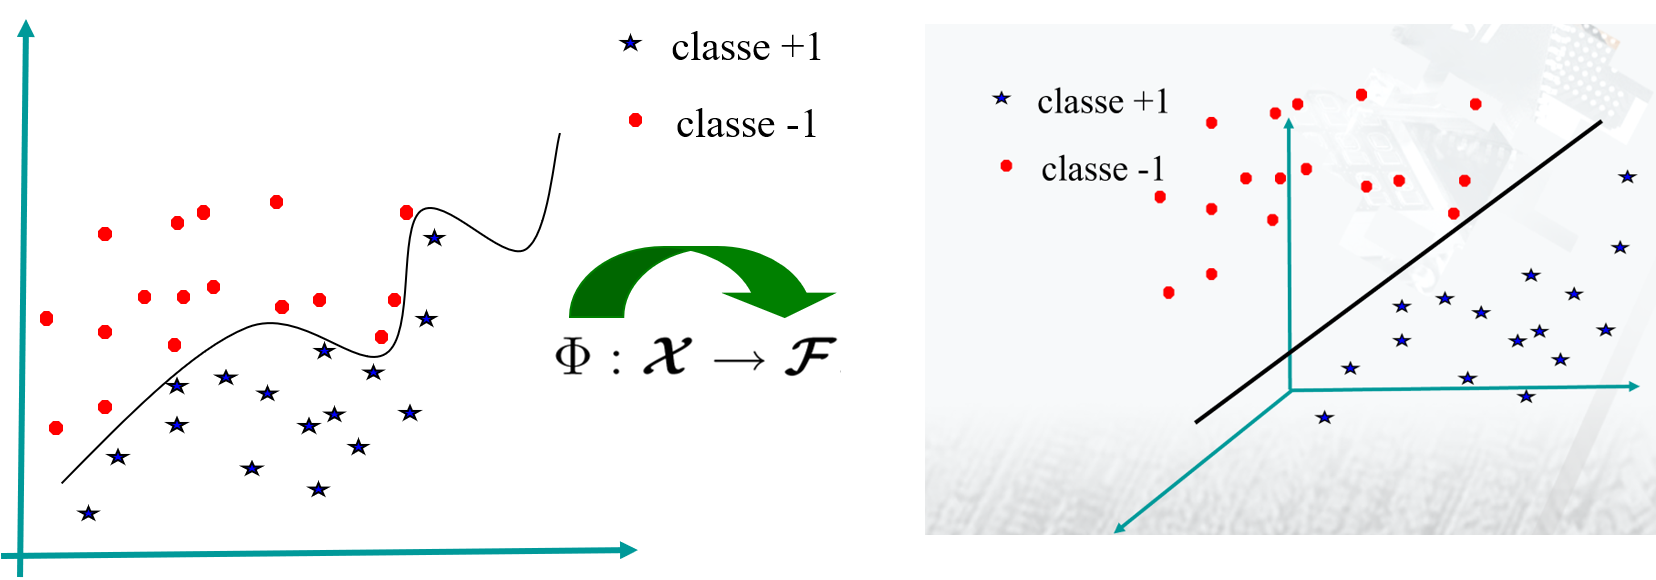

## Question

Refaites la classification de la base de données `iris` mais avec un noyau gaussien. Testez l’effet du paramètre d’échelle du noyau (`gamma`) et du paramètre de régularisation `C`.

In [16]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
X, y = iris.data[:, :4], iris.target
kernel = 1.0 * RBF(1.0)
gpc = svm.SVC(C=0.2, kernel='rbf', gamma=0.5)
gpc.fit(X_train, y_train)
pred = gpc.predict(X_test)
f1_score(pred, y_test, average='micro')

0.96



```
# Ce texte est au format code
```

Comme dans la partie précédente, nous pouvons afficher la frontière de décision en ne conservant que deux variables explicatives :

In [17]:
X, y = iris.data[:,:2], iris.target
# On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

Text(0.5, 1.0, 'SVM RBF')

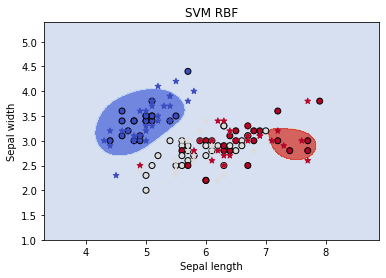

In [18]:
clf = svm.SVC(C=0.2, kernel='rbf', gamma=5)
clf.fit(X_train, y_train)

# Pour afficher la surface de décision on va discrétiser l'espace avec un pas h
h = .01
# Créer la surface de décision discretisée
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Surface de décision
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Afficher aussi les points d'apprentissage
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("SVM RBF")

## Question

Que constatez-vous par rapport à la partie précédente ?

In [ ]:
#On remarque que ce n'est plus linéaire mais plus cyclique. On a un paramètre gamma en plus qui influence énormément l'apparence du graphique.

## Jeu de données Digits

Reprenons notre base de données Digits de chiffres manuscrits.

In [19]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

(1797, 64)
(1797,)


## Question

Réalisez une classification par une SVM linéaire et une SVM à noyau gaussien du jeu de données Digits.
Comment est choisi le paramètre `gamma` dans scikit-learn ? Testez différentes valeurs de ce paramètre pour évaluer son influence. En particulier, testez les paramètres `gamma='auto'` et `gamma='scale'`. À quoi correspondent-ils ?

In [20]:
#Scale de gamma à pour valeur par défaut : 1 / (n_features * X.var())
# SVM linéaire
lin_svc = svm.LinearSVC(C=0.2)
lin_svc.fit(X_train, y_train)
lin_svc.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.9388888888888889

In [24]:
# SVM à noyau gaussien
clf = svm.SVC(C=0.1, kernel='rbf', gamma=0.6)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.08333333333333333

In [25]:
#Gamma est définit par 1 / n_features de base
clf = svm.SVC(C=0.1, kernel='rbf', gamma='auto')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.08333333333333333

In [26]:
# gamma scale est proportionnelle 
clf = svm.SVC(C=0.1, kernel='rbf', gamma='scale')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9277777777777778

## Question :

Réalisez une analyse en composante principale (ACP) et gardez les 2 premières composantes principales (voir la [documentation Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)). Ensuite faites une classification avec un noyau gaussien et affichez les points de test ainsi que la surface de décision (reprendre le code du TP SVM linéaire). Comparez avec une SVM linéaire.

In [68]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y)

(1797, 64)
(1797,)


In [69]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X)
X.shape
#La taille après réduction sera de 2 comme demandé dans la consigne

(1797, 2)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = svm.SVC(C=0.1, kernel='rbf', gamma=0.001)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
#On a une mauvaise précision

0.6138888888888889

In [71]:
clf = svm.SVC(C=0.1, kernel='linear', gamma=0.1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
#Même chose ici

0.6333333333333333

Text(0.5, 1.0, 'LinearSVC')

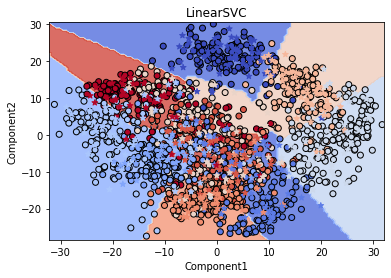

In [72]:
# Surface de décision sur une PCA avec un noyau linéaire

clf = svm.SVC(C=0.1, kernel='linear', gamma=0.1)
clf.fit(X_train, y_train)

# Créer la surface de décision discretisée
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# Pour afficher la surface de décision on va discrétiser l'espace avec un pas h
h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Surface de décision
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Afficher aussi les points d'apprentissage
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('Component1')
plt.ylabel('Component2')
plt.title("LinearSVC")

Text(0.5, 1.0, 'LinearSVC')

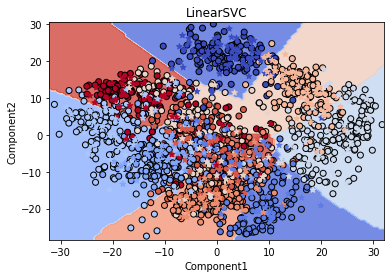

In [73]:
# Surface de décision sur une PCA avec un noyau gaussien

clf = svm.SVC(C=0.1, kernel='rbf', gamma=0.001)
clf.fit(X_train, y_train)

# Créer la surface de décision discretisée
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# Pour afficher la surface de décision on va discrétiser l'espace avec un pas h
h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Surface de décision
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Afficher aussi les points d'apprentissage
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('Component1')
plt.ylabel('Component2')
plt.title("LinearSVC")

In [ ]:
#On a une forme similaire

## Question

Réalisez une recherche par grille afin de déterminer sur le jeu de données Digits complet (sans l’ACP) :

- le meilleur noyau à utiliser,  
- la meilleure valeure de `C`,  
- la meilleure valeur de `gamma` (ou le degré du polynome pour un noyau polynomial).  
- (optionnel) la meilleure valeur de `n_components` de l’ACP  

In [50]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y)

(1797, 64)
(1797,)


In [62]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.90, random_state=0)
parameters = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-3, 2, 6), 'kernel':['rbf', 'linear']}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9888888888888889

In [63]:
clf.best_params_
#(-3,2,6) est le meilleur, il permet d'obtenir un C : 0 et gamma : 0.001

{'C': 1.0, 'gamma': 0.001, 'kernel': 'rbf'}

## Question

(optionnel) Combien de composantes faut-il garder au minimum dans l’ACP pour classer correctement au moins 97% des images ? À quel facteur de réduction de dimension cela correspond-il ?

(1797, 64)
(1797,)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm

# On créé deux groupes séparés (échantillons de gaussiennes)
N = 200
data1 = 0.3 * np.random.randn(N // 2, 2) + [2,2]
data2 = 0.3 * np.random.randn(N // 2, 2) - [2,2]

# On créé 10% de données anormales (*outliers*)
outliers = np.random.uniform(size=(N // 10, 2), low=-6, high=6)

# Les données = groupes + anomalies
X = np.concatenate((data1, data2, outliers))

plt.scatter(X[:,0], X[:,1]) and plt.show()

Nous pouvons ensuite créer le modèle de one-class SVM avec sklearn. Le paramètre nu correspond à la proportion maximale d’erreurs autorisées, c’est-à-dire au pourcentage maximal de points du jeu de données que l’on acceptera d’exclure de notre classe. Cette fraction doit peu ou prou correspondre au pourcentage de données anormales attendu dans le jeu de données. Dans notre cas, nous savons qu’il y a environ 10% d”outliers donc nous pouvons choisir nu=0.1.

In [ ]:
# Construction du modèle (noyau RBF)
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.5)
clf.fit(X)

Le code suivant permet alors de tracer les frontières (plus exactement les lignes de niveaux) de la fonction de décision de la OneClassSVM ainsi entraînée :

In [ ]:
# Afficher les points et les vecteurs les plus proches du plan de séparation
xx, yy = np.meshgrid(np.linspace(-7, 7, 500), np.linspace(-7, 7, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
y_pred = clf.predict(X)

# Choix du jeu de couleurs
plt.set_cmap(plt.cm.Paired)
# Trace le contour de la fonction de décision
plt.contourf(xx, yy, Z)
# Affiche les points considérés comme "inliers"
plt.scatter(X[y_pred>0,0], X[y_pred>0,1], c='white', edgecolors='k', label='inliers')
# Affiche les points considérés comme "outliers"
plt.scatter(X[y_pred<=0,0], X[y_pred<=0,1], c='black', label='outliers')
plt.legend()
plt.show()



Question

Testez plusieurs valeurs pour le paramètre gamma. Pour quelle valeur le résultat semble meilleur (moins de outliers incorrectement classés) ? En pratique on ne connait pas les outliers, l’utilité des OCSVM est de les détecter. Le paramètre nu doit aussi avoir une bonne valeur pour ne pas sous-estimer (ou sur-estimer) le support de la distribution.


Réponse :

Visuellement, une valeur de gamma entre 1e-4 et 5e-2 semble acceptable : les centres des gaussiennes sont identifiées comme inliers tandis que les points plus éloignés sont marqués comme aberrants (outliers), ce qui correspond à la façon dont on a généré les données.

## SVM pour la régression

Dans le cas de la régression, l’objectif est d’apprendre un modèle qui prédit les valeurs d’une fonction à partir des valeurs des variables d’entrée. L’idée est de trouver la fonction la plus « lisse » qui passe par les (ou à proximité des) données d’apprentissage. Scikit-learn implémente le modèle SVR (epsilon-regression) dans le module Python `sklearn.svm.SVR` dont vous pouvez bien sûr consulter [la documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html).

Dans cette partie nous présenterons la régression dans le cas unidimensionnel en comparant plusieurs noyaux avec scikit-learn. Le module `sklearn.svm.SVR` permet de faire varier tous les paramètres.

Il faut d’abord importer les modules :

In [75]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVR

### Données synthétiques

Dans un premier temps, nous allons travailler sur des données générées. Notre objectif sera de reproduire une sinusoïde, comme dans le TP sur les arbres de décision :

In [76]:
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

On ajoute un bruit aléatoire sur 20% des observations. Nos échantillons d’entraînement correspondent donc à la courbe suivante :

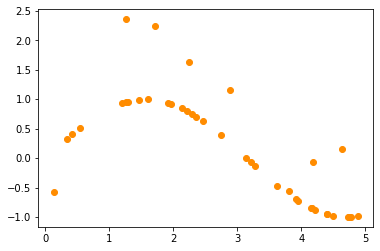

In [77]:
y[::5] += 3 * (0.5 - np.random.rand(8))
plt.scatter(X, y, color='darkorange', label='Données')

Nous pouvons facilement entraîner trois modèles de SVM pour la régression grâce à la classe `SVR` de scikit-learn :

In [78]:
# Création des SVM
C = 1e3
svr_rbf = SVR(kernel='rbf', C=C, gamma=0.1)
svr_lin = SVR(kernel='linear', C=C)
svr_poly = SVR(kernel='poly', C=C, degree=2)

# Entraînement des SVM sur les observations bruitées
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

Afficher les résultats :

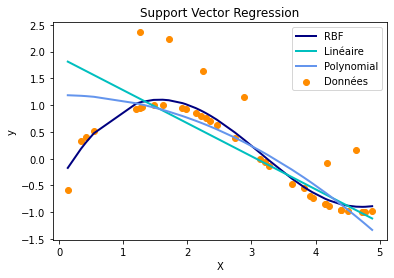

In [79]:
plt.scatter(X, y, color='darkorange', label='Données')
plt.plot(X, y_rbf, color='navy', lw=2, label='RBF')
plt.plot(X, y_lin, color='c', lw=2, label='Linéaire')
plt.plot(X, y_poly, color='cornflowerblue', lw=2, label='Polynomial')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

### Question :

Pourquoi employer une valeur aussi grande pour le parametre `C` (ici, `C = 1000`) ?

La constante C>0 permet de choisir le point d’équilibre entre l’aplatissement de la solution et l’acceptation d’erreurs au-delà de ϵ-SVM pour la régression. Une valeur trop petite de C nous donne un estimateur trop lisse (sous apprentissage). Pour une valeur trop grande, la fonction estimée prend trop en compte le bruit (sur-apprentissage).